# Проект по исследованию данных о постах и пользователях на StackOverflow

<b>Цель исследования:</b>
овладеть продвинутыми навыками SQL, оконными функцями.

<b>Задачи исследования:</b>
произвести различные выгрузки данных о постах и пользователях на StackOverflow с помощью SQL.

<b>Источник данных: </b> версия базы данных StackOverflow, где хранятся данные о постах за 2008 год, но в таблицах присутствует информацию и о более поздних оценках, которые эти посты получили.

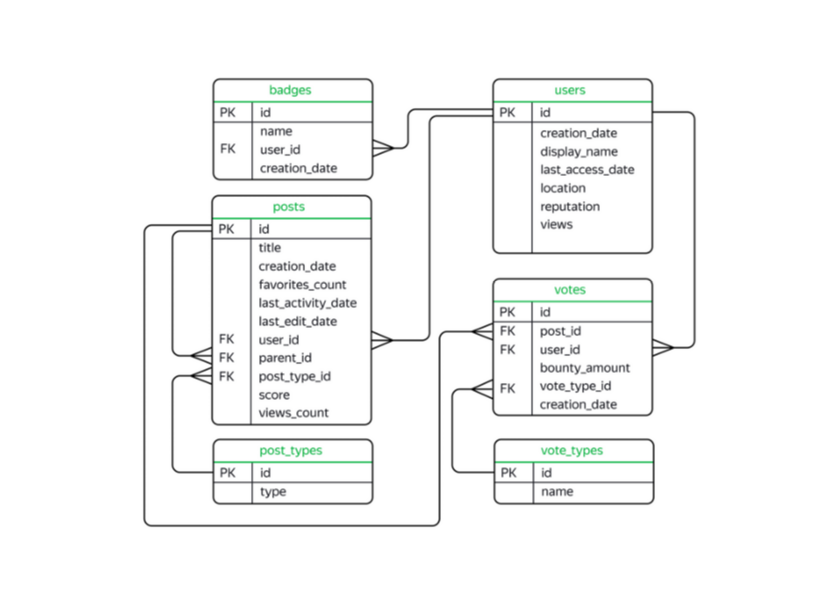

<b>Описание таблиц базы данных:</b>

Таблица `stackoverflow.badges` включает поля:
- `id` — Идентификатор значка, первичный ключ таблицы;
- `name` — Название значка;
- `user_id` — Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице `users`;
- `creation_date` — Дата присвоения значка.

Таблица `stackoverflow.post_types` включает поля:
- `id` — Идентификатор поста, первичный ключ таблицы;
- `type` — Тип поста:
    - `question` — пост с вопросом;
    - `answer` — пост с ответом.

`stackoverflow.posts` включает поля:
- `id` — Идентификатор поста, первичный ключ таблицы;
- `title` — Заголовок поста;
- `creation_date` — Дата создания поста;
- `favorites_count` — Число, которое показывает, сколько раз пост добавили в «Закладки»;
- `last_activity_date` — Дата последнего действия в посте, например комментария;
- `last_edit_date` — Дата последнего изменения поста;
- `user_id` — Идентификатор пользователя, который создал пост, внешний ключ к таблице `users`;
- `parent_id` — Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом;
- `post_type_id` — Идентификатор типа поста, внешний ключ к таблице `post_types`;
- `score` — Количество очков, которое набрал пост;
- `views_count` — Количество просмотров.

`stackoverflow.users` включает поля:
- `id` — Идентификатор пользователя, первичный ключ таблицы;
- `creation_date` — Дата регистрации пользователя;
- `display_name` — Имя пользователя;
- `last_access_date` — Дата последнего входа;
- `location` — Местоположение;
- `reputation` — Очки репутации, которые получают за хорошие вопросы и полезные ответы;
- `views` — Число просмотров профиля пользователя.

`stackoverflow.vote_types` включает поля:
- `id` — Идентификатор типа голоса, первичный ключ;
- `name` — Название метки:
    - `UpMod` — посты с вопросами или ответами, которые пользователи посчитали уместными и полезными;
    - `DownMod` — посты, которые показались пользователям наименее полезными;
    - `Close` — посты нужно доработать или они вообще не подходят для платформы;
    - `Offensive` - посты в грубой и оскорбительной манере;
    - `Spam` - пост пользователя выглядит откровенной рекламой.

`stackoverflow.votes` включает поля:
- `id` — Идентификатор голоса, первичный ключ;
- `post_id` — Идентификатор поста, внешний ключ к таблице `posts`;
- `user_id` — Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице `users`;
- `bounty_amount` — Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту;
- `vote_type_id` — Идентификатор типа голоса, внешний ключ к таблице `vote_types`;
- `creation_date` — Дата назначения голосае.

<b><u>Задание №1</u></b><br>
Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

<div style="border: solid green 1px; padding: 10px">
SELECT COUNT(post_type_id)<br>
FROM stackoverflow.posts<br>
WHERE (favorites_count >= 100 OR score > 300) AND post_type_id = 1;

<b><u>Результат:</u></b>

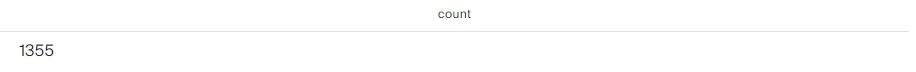

<b><u>Задание №2</u></b><br>
Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа..

<div style="border: solid green 1px; padding: 10px">
WITH<br>
avg_cnt AS<br>
    (SELECT CAST(DATE_TRUNC('day', creation_date) AS date) AS date, <br>
     COUNT(id)<br>
FROM stackoverflow.posts<br>
WHERE post_type_id = 1<br>
GROUP BY CAST(DATE_TRUNC('day', creation_date) AS date)<br>
HAVING CAST(DATE_TRUNC('day', creation_date) AS date) BETWEEN '2008-11-01' AND '2008-11-18')<br>

SELECT ROUND(AVG(count))<br>
FROM avg_cnt;

<b><u>Результат:</u></b>

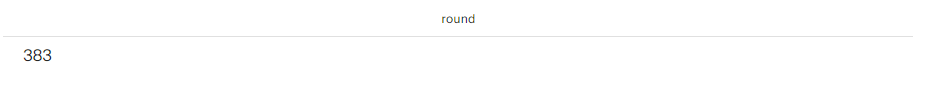

<b><u>Задание №3</u></b><br>
Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

<div style="border: solid green 1px; padding: 10px">
SELECT COUNT(DISTINCT(u.id))<br>
FROM stackoverflow.users u<br>
JOIN stackoverflow.badges b ON u.id=b.user_id<br>
WHERE CAST(DATE_TRUNC('day', u.creation_date) AS date) = CAST(DATE_TRUNC('day', b.creation_date) AS date);

<b><u>Результат:</u></b>

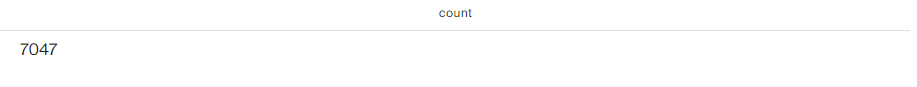

<b><u>Задание №4</u></b><br>
Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

<div style="border: solid green 1px; padding: 10px">
SELECT COUNT(DISTINCT(p.id))<br>
FROM stackoverflow.posts p<br>
JOIN stackoverflow.users u ON p.user_id=u.id<br>
RIGHT JOIN stackoverflow.votes v ON p.id = v.post_id<br>
WHERE u.display_name LIKE 'Joel Coehoorn';

<b><u>Результат:</u></b>

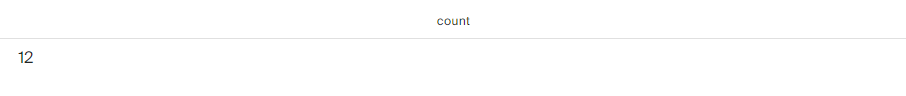

<b><u>Задание №5</u></b><br>
Выгрузите все поля таблицы `vote_types`. Добавьте к таблице поле `rank`, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю `id`.

<div style="border: solid green 1px; padding: 10px">
SELECT *,<br>
      RANK() OVER (ORDER BY id) AS rank<br>
FROM stackoverflow.vote_types;

<b><u>Результат:</u></b>

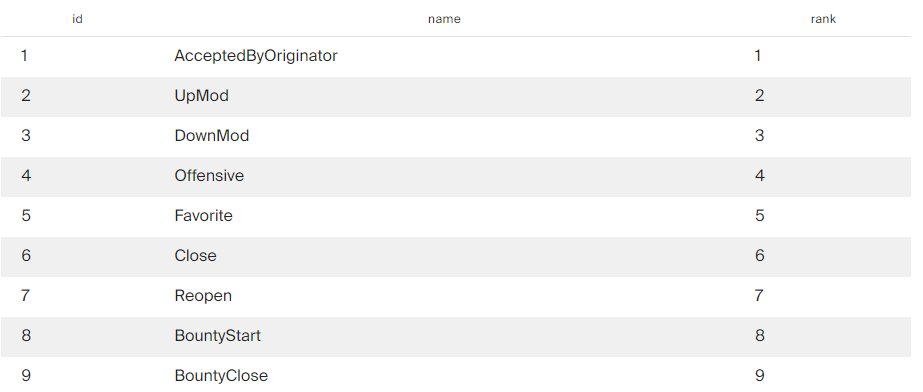

<b><u>Задание №6</u></b><br>
ДОтберите 10 пользователей, которые поставили больше всего голосов типа `Close`. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

<div style="border: solid green 1px; padding: 10px">
SELECT user_id, COUNT(id)<br>
FROM stackoverflow.votes <br>
WHERE vote_type_id = 6<br>
GROUP BY user_id<br>
ORDER BY COUNT(id) DESC, user_id DESC<br>
LIMIT 10;

<b><u>Результат:</u></b>

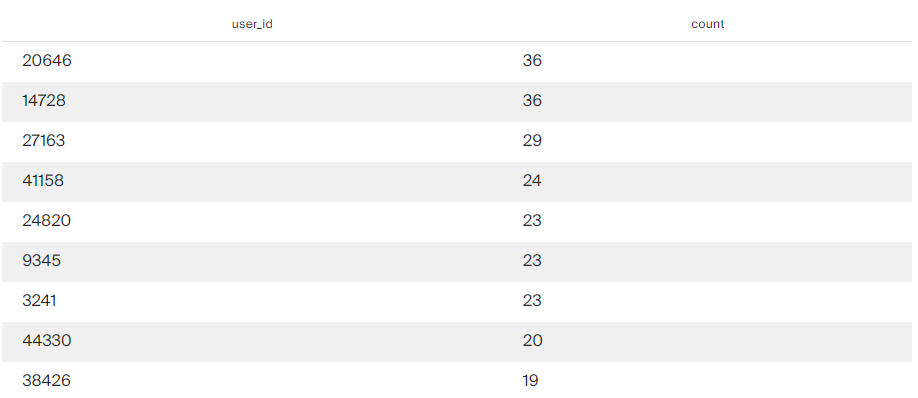

<b><u>Задание №7</u></b><br>
Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.
Отобразите несколько полей:
- идентификатор пользователя;
- число значков;
- место в рейтинге — чем больше значков, тем выше рейтинг.

Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.<br>
Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

<div style="border: solid green 1px; padding: 10px">
SELECT user_id, <br>
       COUNT(id),<br>
        DENSE_RANK() OVER (ORDER BY COUNT(id) DESC)<br>
FROM stackoverflow.badges<br>
WHERE creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'<br>
GROUP BY user_id<br>
ORDER BY COUNT(id) DESC, user_id<br>
LIMIT 10

<b><u>Результат:</u></b>

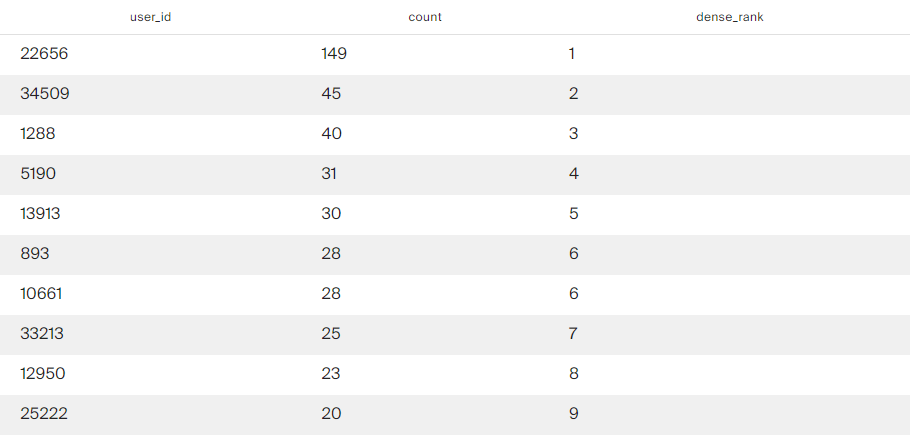

<b><u>Задание №8</u></b><br>
Сколько в среднем очков получает пост каждого пользователя?
Сформируйте таблицу из следующих полей:
- заголовок поста;
- идентификатор пользователя;
- число очков поста;
- среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

<div style="border: solid green 1px; padding: 10px">
SELECT title,<br>
       user_id,<br>
       score,<br>
       ROUND(AVG(score) OVER (PARTITION BY user_id))<br>
FROM stackoverflow.posts<br>
WHERE title IS NOT NULL AND score <> 0;

<b><u>Результат:</u></b>

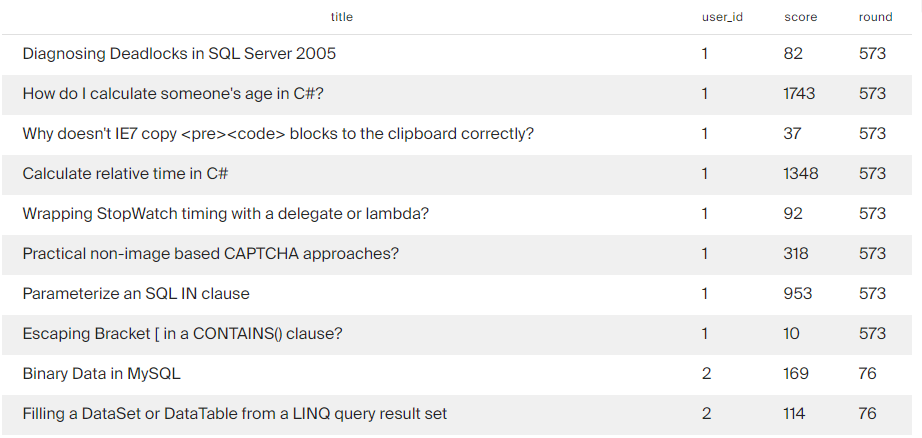

<b><u>Задание №9</u></b><br>
Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

<div style="border: solid green 1px; padding: 10px">
SELECT title<br>
FROM stackoverflow.posts<br>
WHERE user_id IN<br>
(<br>
SELECT  user_id FROM stackoverflow.badges GROUP BY user_id HAVING COUNT(id)>1000<br>
) AND title IS NOT NULL;

<b><u>Результат:</u></b>

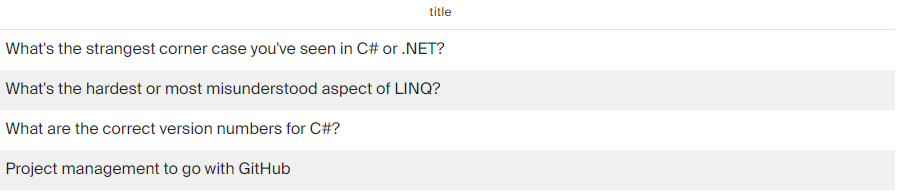

<b><u>Задание №10</u></b><br>
Напишите запрос, который выгрузит данные о пользователях из США (англ. United States). Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
- пользователям с числом просмотров больше либо равным 350 присвойте группу `1`;
- пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу `2`;
- пользователям с числом просмотров меньше 100 — группу `3`.

Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с нулевым количеством просмотров не должны войти в итоговую таблицу.

<div style="border: solid green 1px; padding: 10px">
SELECT id,<br>
       views,<br>
       CASE <br>
       WHEN views >= 350 THEN 1<br>
       WHEN views < 100 THEN 3<br>
       ELSE 2<br>
       END<br>
FROM stackoverflow.users<br>
WHERE views <> 0 AND location LIKE '%United States%';

<b><u>Результат:</u></b>

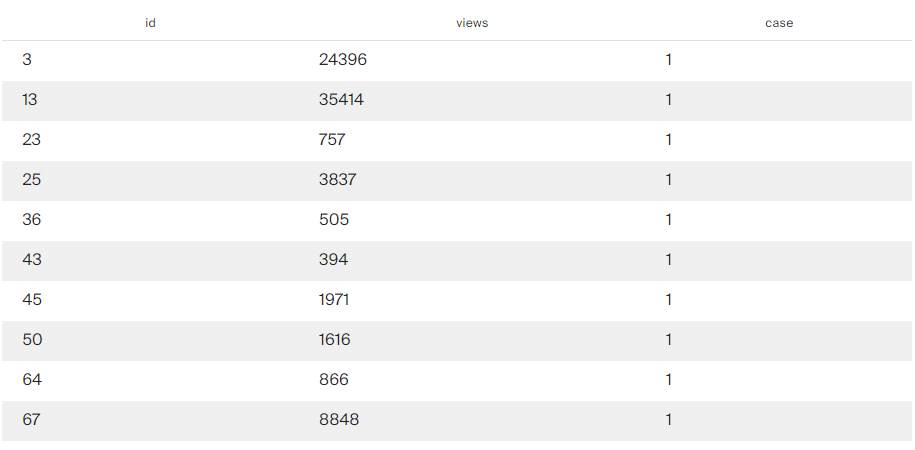

<b><u>Задание №11</u></b><br>
Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

<div style="border: solid green 1px; padding: 10px">
WITH tab_1 AS<br>
(<br>
    SELECT id,<br>
       views,<br>
       (CASE <br>
       WHEN views >= 350 THEN 1<br>
       WHEN views < 100 THEN 3<br>
       ELSE 2<br>
       END) AS category<br>
FROM stackoverflow.users<br>
WHERE views <> 0 AND location LIKE '%United States%')<br>
SELECT id,<br>
       category,<br>
       views<br>
FROM<br>
  (SELECT *,<br>
          rank() over(PARTITION BY category<br>
                      ORDER BY views DESC) AS ranks<br>
   FROM tab_1) AS tab_2<br>
WHERE ranks = 1<br>
ORDER BY views DESC, id

<b><u>Результат:</u></b>

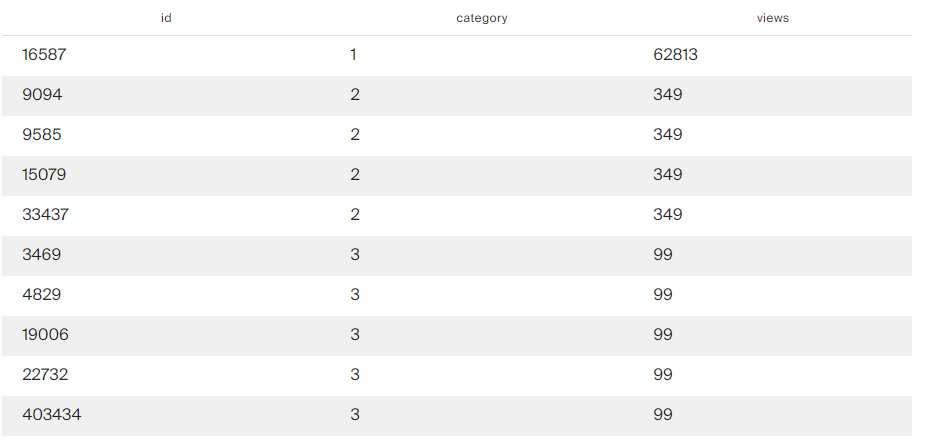

<b><u>Задание №12</u></b><br>
Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:
- номер дня;
- число пользователей, зарегистрированных в этот день;
- сумму пользователей с накоплением.

<div style="border: solid green 1px; padding: 10px">
WITH vr AS<br>
(SELECT CAST(DATE_TRUNC('day', creation_date) AS date) AS dt,<br>
        COUNT(id) AS cnt<br>
FROM stackoverflow.users<br>
GROUP BY CAST(DATE_TRUNC('day', creation_date) AS date)<br>
ORDER BY CAST(DATE_TRUNC('day', creation_date) AS date))<br>

SELECT RANK() OVER (ORDER BY dt),<br>
       cnt,<br>
       SUM(cnt) OVER (ORDER BY dt) as sum<br>
FROM vr <br>
WHERE CAST(DATE_TRUNC('day', dt) AS date) BETWEEN '2008-11-01' AND '2008-11-30';

<b><u>Результат:</u></b>

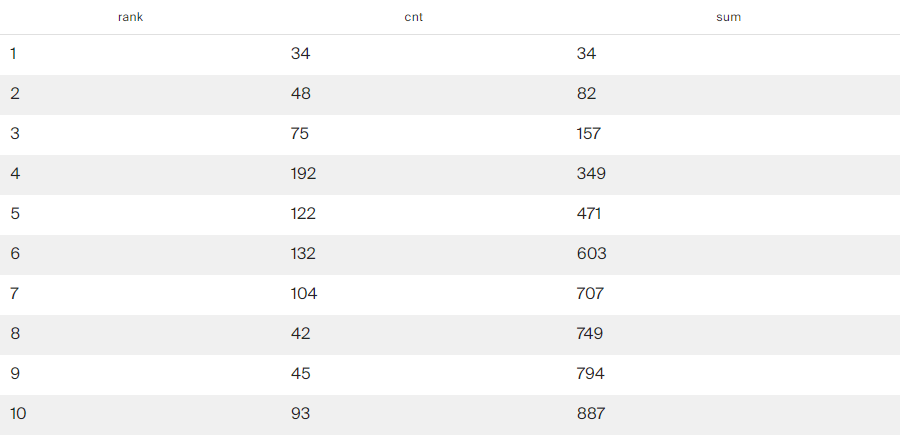

<b><u>Задание №13</u></b><br>
Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. Отобразите:
- идентификатор пользователя;
- разницу во времени между регистрацией и первым постом.

<div style="border: solid green 1px; padding: 10px">
WITH vr AS<br>
(SELECT user_id,<br>
       creation_date,<br>
       RANK() OVER (PARTITION BY user_id ORDER BY creation_date) AS first_date<br>
FROM stackoverflow.posts<br>
ORDER BY user_id)<br>

SELECT user_id,<br>
       vr.creation_date - u.creation_date AS mean<br>
FROM vr<br>
JOIN stackoverflow.users u ON vr.user_id = u.id<br>
WHERE first_date = 1 ;

<b><u>Результат:</u></b>

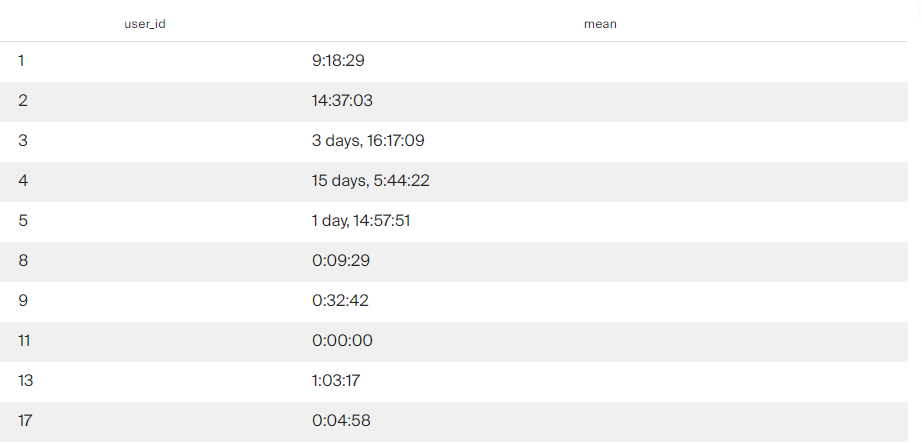